# LAB 4 : Multi Layered Neural Netwrok and Backpropogation  

Name : Vaishnavi, Joshitha

Roll Number : 180020039, 180020009

Referrence Material : 
      
  1. **Chapter 4:, page no. 106-136, Artificial Neural Network by B. Yegnanarayana)**

  2. https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

  3. https://www.geeksforgeeks.org/deep-neural-net-with-forward-and-back-propagation-from-scratch-python/

  4. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

  5. https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484

#**Problem 1** : Demonstrate the working principle of multi layer neural network, with non-linearly separable and non-convex data.

Observation to be demonstrated:
1. Two layer neural network (i.e one output layer) not able to classify non-linearly
separable data. Solve the problem by increasing the no. of layer and changing the
activation function from hard-limiting to sigmoid.
2. Similar observations have to be demonstrated for non-convex data.(i.e 3 layer network not able to learn the appropriate separating hyper plane, which being resolved
using 4 layer network.)
3. Show that, using sigmoid activation, the gradient vanishing/ exploding happens
during training, try to resolve this problem by changing the activation function.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



### Objective: 

Demonstrate the working of 3-layer network for non linearly seperable data and the working of 4-layer NN for non-convex data.

### Hypothesis: 

For non-linearly seperable data, the 3-layer NN and changing of activation function from hard-limiting to sigmoid should able to learn optimal weights and do the classification.

For non-convex data, the 4 -layer NN should able to learn optimal weights and do the classification, with the appropiate decison boundary.

### Experimental Description:

For Non - linearly seperable data:

1. Generate Non Linearly Seperable Data.

2. Train a two layered neural network (perceptron without a hidden layer), for classification and check the results.

3. Train a 3-layer NN, with backpropagation on the same, and check the results.


## Programming : 
  Please write a program to demonstrate the same

**Step 1** : Data Generation, Generate Non Linearly Seperable and Non Convex Data

**Step 2** : Demonstrate how two layered neural network (perceptron without a hidden layer) fails to classify non linearly separable data

**Step 3** : Demonstrate how addition of a hidden layer helps in overcoming this problem (Backpropogation)

**Step 4** : Demonstrate how 3 Layered Neural network fails on non convex data and 4 layered (2 hidden layers) helps solve this problem

**Step 5** : Demonstrate the effect of Vanishing/Exploding gradients occur and how you can solve it

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio
from IPython.display import HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs


Step 1: Generating Non-linearly seperable data

(50, 2) (50,)


Text(0.5, 1.0, 'Non-linearly Seperable Data')

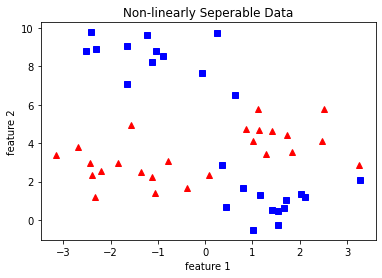

In [ ]:
X, y = make_blobs(n_samples=50, centers=4, n_features=2, random_state=0)
print(X.shape, y.shape)
labels_orig = y
y = np.mod(labels_orig, 2)# converting into binary class

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Non-linearly Seperable Data')


**Step 2** : Demonstrate how two layered neural network (perceptron without a hidden layer)

In [ ]:
def step_func(z):      #hard-limiting step function
        return 1.0 if (z > 0) else 0.0 

def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        

        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        if epoch % 10 ==0:
          plot_decision_boundary(X, theta, epoch)

        
    return theta, n_miss_list


In [ ]:
def plot_decision_boundary(X, theta, epoch):
    
    # X --> Inputs
    # theta --> parameters
    
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    s = 'Epoch Number : ' + str(epoch)
    plt.title(s)
    plt.plot(x1, x2, 'y-')


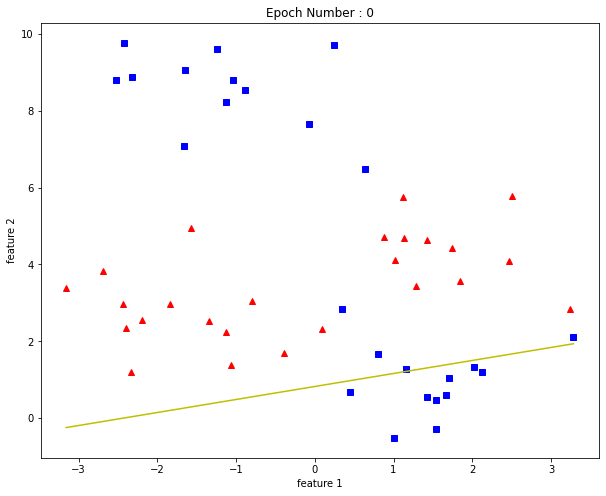

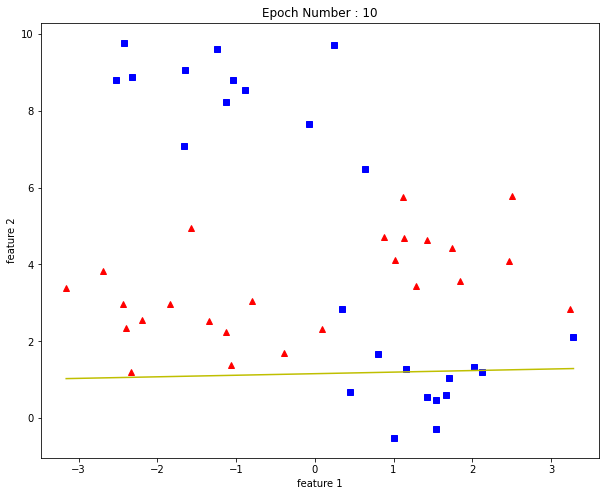

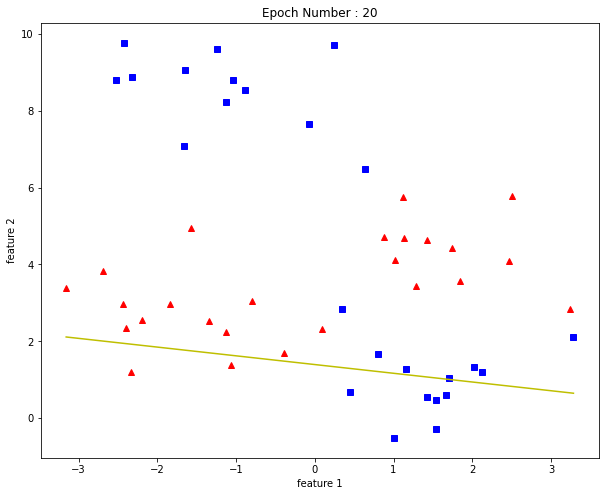

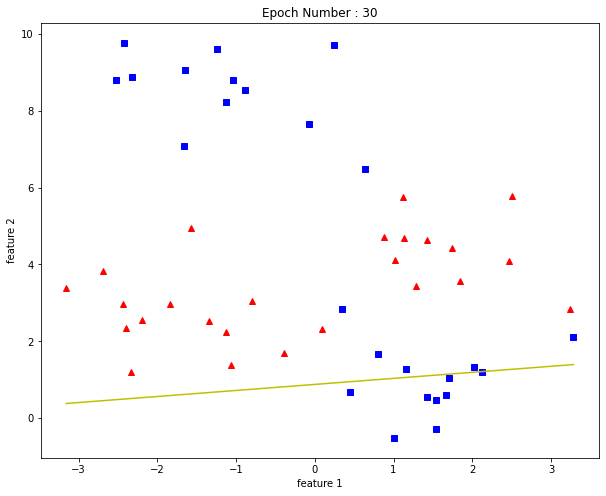

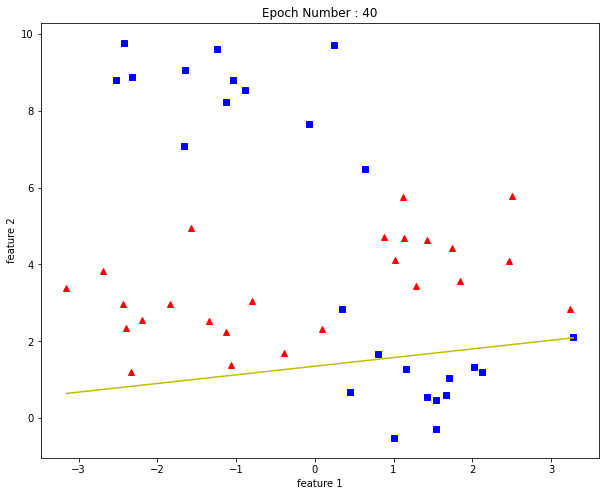

In [ ]:
l_r = 0.5
n_epoch = 50
theta, miss_l = perceptron(X, y, 0.5,n_epoch)

Text(0.5, 1.0, 'Perceptron Learning for Non-linear')

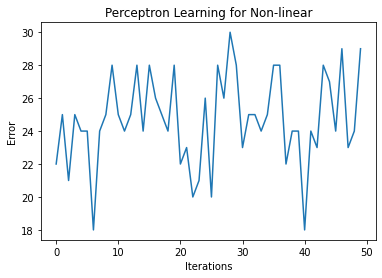

In [ ]:
plt.plot(range(n_epoch), miss_l)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Perceptron Learning for Non-linear")


**Step 3** : Demonstrate how addition of a hidden layer helps in overcoming this problem (Backpropogation)


In [ ]:
#prepare dataset : append the labels
dataset = []
for i in range(len(y)):
  temp = [X[i][0] , X[i][1], y[i]]
  dataset.append(temp)


In [ ]:
from math import exp
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)] #[w1,w2,b1],[w3,w4,b2]..and so on 8 times for each hidden layer
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)] #[w5,w6,b2]..and so on for each output layer
	network.append(output_layer)
	return network

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]  #bias added 
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation)) #sigmoid activation function

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j]) #dEtot/dout1
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
  err = []
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
      outputs = forward_propagate(network, row)
      expected = [0 for i in range(n_outputs)]
      expected[row[-1]] = 1
      sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
      backward_propagate_error(network, expected)
      update_weights(network, row, l_rate)
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    err.append(sum_error)
  return err


In [ ]:
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
n_neurons_hidden_layer = 8
network = initialize_network(n_inputs, n_neurons_hidden_layer, n_outputs)
lr = 0.5
n_epochs = 1000
err = train_network(network, dataset, lr, n_epochs, n_outputs)

>epoch=0, lrate=0.500, error=38.765
>epoch=1, lrate=0.500, error=27.651
>epoch=2, lrate=0.500, error=25.645
>epoch=3, lrate=0.500, error=23.722
>epoch=4, lrate=0.500, error=21.998
>epoch=5, lrate=0.500, error=20.480
>epoch=6, lrate=0.500, error=19.211
>epoch=7, lrate=0.500, error=18.116
>epoch=8, lrate=0.500, error=17.069
>epoch=9, lrate=0.500, error=16.023
>epoch=10, lrate=0.500, error=15.006
>epoch=11, lrate=0.500, error=14.032
>epoch=12, lrate=0.500, error=13.077
>epoch=13, lrate=0.500, error=12.158
>epoch=14, lrate=0.500, error=11.336
>epoch=15, lrate=0.500, error=10.643
>epoch=16, lrate=0.500, error=10.073
>epoch=17, lrate=0.500, error=9.598
>epoch=18, lrate=0.500, error=9.191
>epoch=19, lrate=0.500, error=8.839
>epoch=20, lrate=0.500, error=8.530
>epoch=21, lrate=0.500, error=8.259
>epoch=22, lrate=0.500, error=8.019
>epoch=23, lrate=0.500, error=7.805
>epoch=24, lrate=0.500, error=7.613
>epoch=25, lrate=0.500, error=7.438
>epoch=26, lrate=0.500, error=7.278
>epoch=27, lrate=0.50

Text(0.5, 1.0, '2-layer Neural Network for Non-linear')

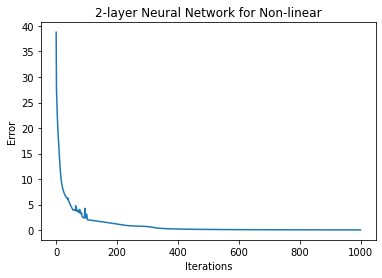

In [ ]:
plt.plot(range(n_epochs), err)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("2-layer Neural Network for Non-linear")


In [ ]:
for layer in network:
  print(layer)
  print(len(layer))
  print()

[{'weights': [5.447983823987191, -1.9687970249135496, 7.0340376211177835], 'output': 3.6893080938692174e-11, 'delta': 2.2696804014801655e-13}, {'weights': [5.019680968022838, 2.2779559214927834, -6.178580058970409], 'output': 0.7665881798513768, 'delta': -0.0010857829292763134}, {'weights': [4.94513022041102, 2.124182048613965, -5.599982144030731], 'output': 0.6434367192584122, 'delta': -0.0013508584720039716}, {'weights': [-4.684240238901833, -0.35594701350256197, 5.238006882575893], 'output': 0.9999990831592452, 'delta': -4.404079508255551e-09}, {'weights': [-1.6287023590517955, 4.280750736296665, -5.273413280716539], 'output': 0.9999999999999998, 'delta': 1.4844159593197312e-18}, {'weights': [4.050565176098216, 1.3176934007700638, -1.9979554888811015], 'output': 0.34424153101202726, 'delta': -0.0010904132494265304}, {'weights': [6.425127198461745, 0.6489575677552435, -7.5430635917957245], 'output': 1.504357199611359e-08, 'delta': 9.459050129827593e-11}, {'weights': [-1.6086042433834

Prediction

In [ ]:
from math import exp

# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))


In [ ]:
y_pred = []
for row in dataset:
  prediction = predict(network, row)
  y_pred.append(prediction)

In [ ]:
y_pred = np.array(y_pred)

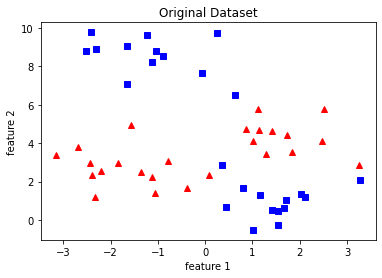

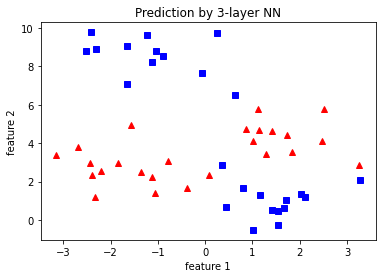

In [ ]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Original Dataset')
plt.show()

plt.plot(X[:, 0][y_pred == 0], X[:, 1][y_pred == 0], 'r^')
plt.plot(X[:, 0][y_pred == 1], X[:, 1][y_pred == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Prediction by 3-layer NN')
plt.show()

## Inferences and Conclusion : State all the key observations and conclusion



1. Two layered neural network (perceptron without a hidden layer) fails to classify non linearly separable data. The error fluctuate and do not converge at any point.

2. Adding a hidden layer and changing the activation function from hard-limiting to sigmoid, the classification was done properly.  8 neurons were used in the hidden layer, and the error converges.  